In [115]:
!pip install catboost

In [116]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from time import time
from pprint import pprint
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier, RidgeClassifier,LogisticRegression
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [117]:
train = pd.read_csv('training_dataset.csv')

In [118]:
train.head(5)

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
0,915132186.0,Especialização,UNIP,Analista Senior,Eletrodomesticos,1.0,1.0,1.0,6.0,Google,28.0,5.0,4.0,0.0,perfil6
1,183037660.0,MBA,NaN,Supervisor,e-commerce,0.0,0.0,1.0,6.0,NaN,66.0,36.0,34.0,0.0,perfil2
2,681614019.0,Bacharelado,UNICAMP,Outros,e-commerce,1.0,1.0,1.0,10.0,Saint Paul,27.0,27.0,27.0,0.0,perfil2
3,398921329.0,SEM FORMAÇÃO,UFRN,Outros,Eletroeletronicos,NaN,1.0,1.0,5.0,Instagram,29.0,10.0,6.0,0.0,perfil5
4,522842284.0,Tecnólogo,INSPER INSTITUTO DE ENSINO E PESQUISA,SEM EXPERIÊNCIA,Eletrodomesticos,NaN,0.0,1.0,7.0,Google,67.0,49.0,44.0,0.0,perfil2


In [119]:
train[['pretende_fazer_cursos_lit','interesse_mba_lit']].groupby(['pretende_fazer_cursos_lit','interesse_mba_lit']).sum()

,
pretende_fazer_cursos_lit,interesse_mba_lit
0.0,0.0
1.0,1.0


In [120]:
index_null = train.loc[pd.isnull(train['pretende_fazer_cursos_lit']) == True]
index_null = index_null.loc[pd.isnull(index_null['interesse_mba_lit']) == False]
train['pretende_fazer_cursos_lit'].loc[index_null.index] = index_null['interesse_mba_lit'].copy()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [121]:
index_null = train.loc[pd.isnull(train['interesse_mba_lit']) == True]
index_null = index_null.loc[pd.isnull(index_null['pretende_fazer_cursos_lit']) == False]
train['interesse_mba_lit'].loc[index_null.index] = index_null['pretende_fazer_cursos_lit'].copy()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [122]:
train.isna().sum()

id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit      206
interesse_mba_lit              206
importante_ter_certificado    1939
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64

In [123]:
train['importante_ter_certificado'].value_counts()

1.0    13918
Name: importante_ter_certificado, dtype: int64

In [124]:
train['importante_ter_certificado'] = 1.0

In [125]:
train['certificados'].value_counts()

0.0     11800
1.0      1075
2.0       402
3.0       376
4.0       130
5.0        60
6.0        43
7.0        33
8.0        18
9.0        11
11.0       11
10.0        4
17.0        3
12.0        3
20.0        2
25.0        1
13.0        1
16.0        1
32.0        1
29.0        1
15.0        1
18.0        1
14.0        1
Name: certificados, dtype: int64

In [126]:
index_null = train.loc[pd.isnull(train['certificados']) == True]
train['certificados'].loc[index_null.index] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [127]:
columns_reg = ['total_modulos','modulos_iniciados','modulos_finalizados']
df_reg = train[columns_reg].dropna().copy()
df_reg.head(2)

,total_modulos,modulos_iniciados,modulos_finalizados
0,28.0,5.0,4.0
1,66.0,36.0,34.0


In [128]:
def input_null(var_null, df_reg):
  X = df_reg.drop(columns=var_null)
  y = df_reg[var_null]
  reg = LinearRegression().fit(X, y)
  print('Score da regressão', reg.score(X, y))
  return reg

In [129]:
reg = input_null('total_modulos', df_reg)
total_modulos = train.loc[pd.isnull(train['total_modulos']) == True][columns_reg].drop(columns='total_modulos').dropna().copy()
total_modulos_index = train.loc[pd.isnull(train['total_modulos']) == True][columns_reg].drop(columns='total_modulos').dropna().index
total_modulos_predict = reg.predict(total_modulos)
train['total_modulos'].loc[total_modulos_index] = total_modulos_predict

Score da regressão 0.808596514746039


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [130]:
reg = input_null('modulos_iniciados', df_reg)
modulos_iniciados = train.loc[pd.isnull(train['modulos_iniciados']) == True][columns_reg].drop(columns='modulos_iniciados').dropna().copy()
modulos_iniciados_index = train.loc[pd.isnull(train['modulos_iniciados']) == True][columns_reg].drop(columns='modulos_iniciados').dropna().index
modulos_iniciados_predict = reg.predict(modulos_iniciados)
train['modulos_iniciados'].loc[modulos_iniciados_index] = modulos_iniciados_predict

Score da regressão 0.9788397567528497


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [131]:
reg = input_null('modulos_finalizados', df_reg)
modulos_finalizados = train.loc[pd.isnull(train['modulos_finalizados']) == True][columns_reg].drop(columns='modulos_finalizados').dropna().copy()
modulos_finalizados_index = train.loc[pd.isnull(train['modulos_finalizados']) == True][columns_reg].drop(columns='modulos_finalizados').dropna().index
modulos_finalizados_predict = reg.predict(modulos_finalizados)
train['modulos_finalizados'].loc[modulos_finalizados_index] = modulos_finalizados_predict

Score da regressão 0.968815484768082


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [132]:
train.isna().sum()

id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit      206
interesse_mba_lit              206
importante_ter_certificado       0
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                  432
modulos_iniciados              441
modulos_finalizados            460
certificados                     0
categoria                        0
dtype: int64

In [133]:
columns_clf = ['total_modulos','modulos_iniciados','modulos_finalizados','horas_semanais_estudo','certificados']
df_clf = train[columns_clf].dropna().copy()
df_clf.head(2)

,total_modulos,modulos_iniciados,modulos_finalizados,horas_semanais_estudo,certificados
0,28.0,5.0,4.0,6.0,0.0
1,66.0,36.0,34.0,6.0,0.0


In [134]:
def input_null_clf(var_null, df_clf):
  X = df_clf.drop(columns=var_null)
  y = df_clf[var_null]
  clf = RandomForestClassifier().fit(X, y)
  print('Score classificação', clf.score(X, y))
  return clf

In [135]:
clf = input_null_clf('horas_semanais_estudo', df_clf)
horas_semanais_estudo = train.loc[pd.isnull(train['horas_semanais_estudo']) == True][columns_clf].drop(columns='horas_semanais_estudo').dropna().copy()
horas_semanais_estudo_index = train.loc[pd.isnull(train['horas_semanais_estudo']) == True][columns_clf].drop(columns='horas_semanais_estudo').dropna().index
horas_semanais_estudo_predict = clf.predict(horas_semanais_estudo)
train['horas_semanais_estudo'].loc[horas_semanais_estudo_index] = horas_semanais_estudo_predict

Score classificação 0.68677667438214


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [136]:
train['horas_semanais_estudo'].value_counts()

6.0     1822
10.0    1816
2.0     1790
7.0     1761
8.0     1754
9.0     1719
4.0     1709
3.0     1706
5.0     1691
Name: horas_semanais_estudo, dtype: int64

In [137]:
train.describe()

,id,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados
count,1.394500e+04,15651.000000,15651.000000,15857.0,15768.000000,15425.000000,15416.000000,15397.000000,15857.000000
mean,5.544775e+08,0.496837,0.496837,1.0,6.019216,78.266882,36.914638,30.872681,0.315886
std,2.602859e+08,0.500006,0.500006,0.0,2.590644,104.097611,59.018066,52.201947,1.144314
min,1.000340e+08,0.000000,0.000000,1.0,2.000000,1.000000,-0.166946,-8.180172,0.000000
25%,3.283140e+08,0.000000,0.000000,1.0,4.000000,27.000000,6.000000,4.000000,0.000000
50%,5.576492e+08,0.000000,0.000000,1.0,6.000000,41.000000,17.520564,13.000000,0.000000
75%,7.805295e+08,1.000000,1.000000,1.0,8.000000,95.000000,43.000000,35.000000,0.000000
max,9.999894e+08,1.000000,1.000000,1.0,10.000000,2073.000000,1370.000000,1359.000000,32.000000


Verificar outliers total_modulos, modulos_iniciados, modulos_finalizados, certificados

In [138]:
train.shape

(15857, 15)

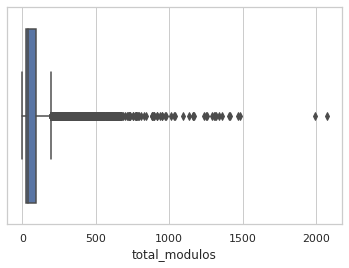

In [139]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=train["total_modulos"])

In [140]:
del_index = train.loc[train['total_modulos']>65].index
train.drop(del_index, inplace=True)
train.shape

(10405, 15)

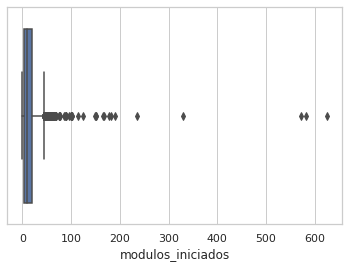

In [141]:
ax = sns.boxplot(x=train["modulos_iniciados"])

In [142]:
del_index = train.loc[train['modulos_iniciados']>46].index
train.drop(del_index, inplace=True)
train.shape

(10096, 15)

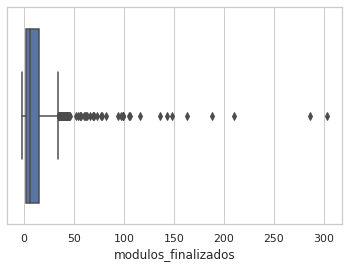

In [143]:
ax = sns.boxplot(x=train["modulos_finalizados"])

In [144]:
del_index = train.loc[train['modulos_finalizados']>40].index
train.drop(del_index, inplace=True)
train.shape

(10010, 15)

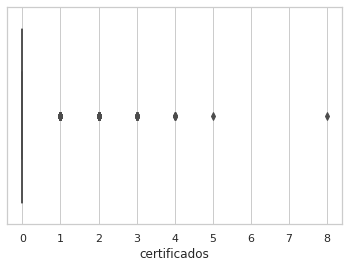

In [145]:
ax = sns.boxplot(x=train["certificados"])

In [146]:
train[['universidade', 'graduacao']].groupby(['universidade', 'graduacao']).sum()

Empty DataFrame
Columns: []
Index: [(CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ, Bacharelado), (CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ, Especialização), (CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ, Licenciatura), (CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ, MBA), (CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ, SEM FORMAÇÃO), (CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ, Tecnólogo), (Escola Paulista de Direito, Bacharelado), (Escola Paulista de Direito, Especialização), (Escola Paulista de Direito, Licenciatura), (Escola Paulista de Direito, MBA), (Escola Paulista de Direito, SEM FORMAÇÃO), (Escola Paulista de Direito, Tecnólogo), (FACULDADE ANHANGUERA, Bacharelado), (FACULDADE ANHANGUERA, Especialização), (FACULDADE ANHANGUERA, Licenciatura), (FACULDADE ANHANGUERA, MBA), (FACULDADE ANHANGUERA, SEM FORMAÇÃO), (FACULDADE ANHANGUERA, Tecnólogo), (FATEC, Bacharelado), (FATEC, Especialização), (FATEC, Licenciatura), (FATEC, MBA), (FATEC, SEM FORMAÇÃO), (FATEC, Tecnólogo), (FGV-RJ, Bacharelado), (FGV-RJ, Especialização), (FGV-RJ, Licenciatura), (FGV-RJ, MBA), (FGV-RJ, SEM FORMAÇÃO), (FGV-RJ, Tecnólogo), (INSPER INSTITUTO DE ENSINO E PESQUISA, Bacharelado), (INSPER INSTITUTO DE ENSINO E PESQUISA, Especialização), (INSPER INSTITUTO DE ENSINO E PESQUISA, Licenciatura), (INSPER INSTITUTO DE ENSINO E PESQUISA, MBA), (INSPER INSTITUTO DE ENSINO E PESQUISA, SEM FORMAÇÃO), (INSPER INSTITUTO DE ENSINO E PESQUISA, Tecnólogo), (UEPB, Bacharelado), (UEPB, Especialização), (UEPB, Licenciatura), (UEPB, MBA), (UEPB, SEM FORMAÇÃO), (UEPB, Tecnólogo), (UFF, Bacharelado), (UFF, Especialização), (UFF, Licenciatura), (UFF, MBA), (UFF, SEM FORMAÇÃO), (UFF, Tecnólogo), (UFPE, Bacharelado), (UFPE, Especialização), (UFPE, Licenciatura), (UFPE, MBA), (UFPE, SEM FORMAÇÃO), (UFPE, Tecnólogo), (UFRJ, Bacharelado), (UFRJ, Especialização), (UFRJ, Licenciatura), (UFRJ, MBA), (UFRJ, SEM FORMAÇÃO), (UFRJ, Tecnólogo), (UFRN, Bacharelado), (UFRN, Especialização), (UFRN, Licenciatura), (UFRN, MBA), (UFRN, SEM FORMAÇÃO), (UFRN, Tecnólogo), (UFSCar, Bacharelado), (UFSCar, Especialização), (UFSCar, Licenciatura), (UFSCar, MBA), (UFSCar, SEM FORMAÇÃO), (UFSCar, Tecnólogo), (UNICAMP, Bacharelado), (UNICAMP, Especialização), (UNICAMP, Licenciatura), (UNICAMP, MBA), (UNICAMP, SEM FORMAÇÃO), (UNICAMP, Tecnólogo), (UNIP, Bacharelado), (UNIP, Especialização), (UNIP, Licenciatura), (UNIP, MBA), (UNIP, SEM FORMAÇÃO), (UNIP, Tecnólogo), (UNIVERSIDADE CRUZEIRO DO SUL, Bacharelado), (UNIVERSIDADE CRUZEIRO DO SUL, Especialização), (UNIVERSIDADE CRUZEIRO DO SUL, Licenciatura), (UNIVERSIDADE CRUZEIRO DO SUL, MBA), (UNIVERSIDADE CRUZEIRO DO SUL, SEM FORMAÇÃO), (UNIVERSIDADE CRUZEIRO DO SUL, Tecnólogo), (UNIVERSIDADE ESTADUAL DE PONTA GROSSA, Bacharelado), (UNIVERSIDADE ESTADUAL DE PONTA GROSSA, Especialização), (UNIVERSIDADE ESTADUAL DE PONTA GROSSA, Licenciatura), (UNIVERSIDADE ESTADUAL DE PONTA GROSSA, MBA), (UNIVERSIDADE ESTADUAL DE PONTA GROSSA, SEM FORMAÇÃO), (UNIVERSIDADE ESTADUAL DE PONTA GROSSA, Tecnólogo), (UNIVERSIDADE NOVE DE JULHO, Bacharelado), (UNIVERSIDADE NOVE DE JULHO, Especialização), (UNIVERSIDADE NOVE DE JULHO, Licenciatura), (UNIVERSIDADE NOVE DE JULHO, MBA), ...]

[126 rows x 0 columns]

In [147]:
index_null = train.loc[pd.isnull(train['modulos_iniciados']) == True]
index_null = index_null.loc[pd.isnull(index_null['modulos_finalizados']) == False]

In [148]:
train['modulos_iniciados'].loc[index_null.index] = index_null['modulos_finalizados'].copy()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [149]:
train['modulos_andamento'] = train['modulos_iniciados'] - train['modulos_finalizados']
train.head(2)

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria,modulos_andamento
0,915132186.0,Especialização,UNIP,Analista Senior,Eletrodomesticos,1.0,1.0,1.0,6.0,Google,28.0,5.0,4.0,0.0,perfil6,1.0
2,681614019.0,Bacharelado,UNICAMP,Outros,e-commerce,1.0,1.0,1.0,10.0,Saint Paul,27.0,27.0,27.0,0.0,perfil2,0.0


In [150]:
train['modulos_pendentes'] = train['total_modulos'] - train['modulos_andamento'] - train['modulos_finalizados']
train.head(2)

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria,modulos_andamento,modulos_pendentes
0,915132186.0,Especialização,UNIP,Analista Senior,Eletrodomesticos,1.0,1.0,1.0,6.0,Google,28.0,5.0,4.0,0.0,perfil6,1.0,23.0
2,681614019.0,Bacharelado,UNICAMP,Outros,e-commerce,1.0,1.0,1.0,10.0,Saint Paul,27.0,27.0,27.0,0.0,perfil2,0.0,0.0


In [151]:
# Verificar nulos base de treino
train.isna().sum()

id                            1222
graduacao                     1192
universidade                  1226
profissao                     1216
organizacao                   1224
pretende_fazer_cursos_lit      133
interesse_mba_lit              133
importante_ter_certificado       0
horas_semanais_estudo           69
como_conheceu_lit             1235
total_modulos                  343
modulos_iniciados              179
modulos_finalizados            339
certificados                     0
categoria                        0
modulos_andamento              339
modulos_pendentes              499
dtype: int64

In [152]:
train.shape

(10010, 17)

In [153]:
train['categoria'].value_counts()

perfil6    4043
perfil2    1619
perfil5    1557
perfil4    1206
perfil1     879
perfil3     706
Name: categoria, dtype: int64

In [154]:
train['graduacao'].value_counts()

Licenciatura      1525
Especialização    1469
Tecnólogo         1463
MBA               1458
Bacharelado       1454
SEM FORMAÇÃO      1449
Name: graduacao, dtype: int64

In [155]:
len(train['id'].unique())

8789

In [156]:
train['universidade'].value_counts()

INSPER INSTITUTO DE ENSINO E PESQUISA    457
UEPB                                     445
UFPE                                     437
USP                                      431
UFSCar                                   425
FGV-RJ                                   421
UNIVERSIDADE ESTADUAL DE PONTA GROSSA    420
UNIP                                     420
Universidade Metodista de Sao Paulo      419
Unesp                                    419
FACULDADE ANHANGUERA                     419
UNICAMP                                  419
UNIVERSIDADE CRUZEIRO DO SUL             419
UFRJ                                     418
UNIVERSIDADE PRESBITERIANA MACKENZIE     410
UFRN                                     410
UFF                                      409
Escola Paulista de Direito               408
UNIVERSIDADE NOVE DE JULHO               407
FATEC                                    391
CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ       380
Name: universidade, dtype: int64

In [157]:
train['profissao'].value_counts()

Outros                     770
SEM EXPERIÊNCIA            765
Diretor                    761
Analista Senior            759
Advogado                   756
Gerente                    737
Sócio/Dono/Proprietário    722
Supervisor                 716
Engenheiro                 712
Assessor                   705
Analista                   697
Coordenador                694
Name: profissao, dtype: int64

In [158]:
train['organizacao'].value_counts()

Estado               836
Entretenimento       821
Montadora            807
Eletroeletronicos    805
servicos             804
Oleo e Gas           799
Eletrodomesticos     792
Siderurgica          792
Laminados            789
Borracha             781
e-commerce           760
Name: organizacao, dtype: int64

In [159]:
train['como_conheceu_lit'].value_counts()

Outros                               1745
Linkedin                              928
Google                                905
Facebook                              886
YouTube                               885
Minha empresa - benefício LITpass     872
Saint Paul                            860
Instagram                             850
Mídia (revista/jornal/web)            844
Name: como_conheceu_lit, dtype: int64

In [160]:
train.loc[train['como_conheceu_lit'] == 'Instagram'].head()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria,modulos_andamento,modulos_pendentes
3,398921329.0,SEM FORMAÇÃO,UFRN,Outros,Eletroeletronicos,1.0,1.0,1.0,5.0,Instagram,29.000000,10.0,6.0,0.0,perfil5,4.0,19.000000
17,820731097.0,Licenciatura,INSPER INSTITUTO DE ENSINO E PESQUISA,Engenheiro,Montadora,1.0,1.0,1.0,7.0,Instagram,29.290014,4.0,2.0,0.0,perfil6,2.0,25.290014
33,NaN,Tecnólogo,UNIP,Coordenador,Entretenimento,1.0,1.0,1.0,6.0,Instagram,41.000000,5.0,3.0,0.0,perfil4,2.0,36.000000
34,290329311.0,Especialização,Universidade Metodista de Sao Paulo,SEM EXPERIÊNCIA,Oleo e Gas,1.0,1.0,1.0,4.0,Instagram,27.000000,17.0,7.0,0.0,perfil5,10.0,10.000000
69,701408537.0,Bacharelado,UNICAMP,Diretor,Oleo e Gas,0.0,0.0,1.0,6.0,Instagram,10.000000,10.0,10.0,0.0,perfil4,0.0,0.000000


In [161]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10010 entries, 0 to 15854
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          8788 non-null   float64
 1   graduacao                   8818 non-null   object 
 2   universidade                8784 non-null   object 
 3   profissao                   8794 non-null   object 
 4   organizacao                 8786 non-null   object 
 5   pretende_fazer_cursos_lit   9877 non-null   float64
 6   interesse_mba_lit           9877 non-null   float64
 7   importante_ter_certificado  10010 non-null  float64
 8   horas_semanais_estudo       9941 non-null   float64
 9   como_conheceu_lit           8775 non-null   object 
 10  total_modulos               9667 non-null   float64
 11  modulos_iniciados           9831 non-null   float64
 12  modulos_finalizados         9671 non-null   float64
 13  certificados                100

In [162]:
colunas_categoricas = list(train.select_dtypes(include='object').columns)

In [163]:
train[colunas_categoricas] = train[colunas_categoricas].fillna('SI').copy()

In [164]:
train.isna().sum()

id                            1222
graduacao                        0
universidade                     0
profissao                        0
organizacao                      0
pretende_fazer_cursos_lit      133
interesse_mba_lit              133
importante_ter_certificado       0
horas_semanais_estudo           69
como_conheceu_lit                0
total_modulos                  343
modulos_iniciados              179
modulos_finalizados            339
certificados                     0
categoria                        0
modulos_andamento              339
modulos_pendentes              499
dtype: int64

In [165]:
train.fillna(0, inplace=True)

In [166]:
train.isna().sum()

id                            0
graduacao                     0
universidade                  0
profissao                     0
organizacao                   0
pretende_fazer_cursos_lit     0
interesse_mba_lit             0
importante_ter_certificado    0
horas_semanais_estudo         0
como_conheceu_lit             0
total_modulos                 0
modulos_iniciados             0
modulos_finalizados           0
certificados                  0
categoria                     0
modulos_andamento             0
modulos_pendentes             0
dtype: int64

In [167]:
#colunas_categoricas.remove('categoria')
colunas_categoricas

['graduacao',
 'universidade',
 'profissao',
 'organizacao',
 'como_conheceu_lit',
 'categoria']

In [168]:
le = LabelEncoder()

for col in colunas_categoricas:
    train[col] = le.fit_transform(train[col]).copy()
    
train.shape

(10010, 17)

In [169]:
# Criando DF cópia
df = train.copy()
df.head(2)

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria,modulos_andamento,modulos_pendentes
0,915132186.0,1,14,2,1,1.0,1.0,1.0,6.0,1,28.0,5.0,4.0,0.0,5,1.0,23.0
2,681614019.0,0,13,8,10,1.0,1.0,1.0,10.0,8,27.0,27.0,27.0,0.0,1,0.0,0.0


In [170]:
df.columns

Index(['id', 'graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados', 'categoria', 'modulos_andamento',
       'modulos_pendentes'],
      dtype='object')

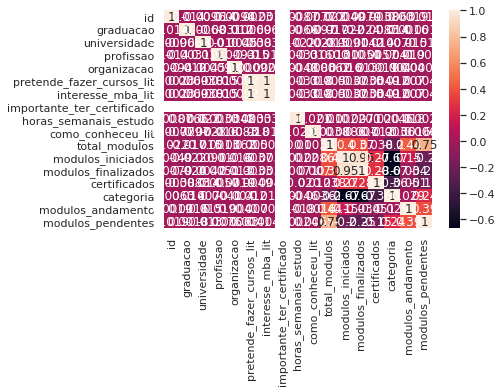

In [171]:
# Correlação das colunas
sns.heatmap(df.corr(), annot=True);

In [172]:
# Selecionando features e target
X = df.drop(columns=['id', 'categoria'])
y = df.categoria

In [173]:
# Verificando Balanceamento da classificação
y.value_counts()

5    4043
1    1619
4    1557
3    1206
0     879
2     706
Name: categoria, dtype: int64

In [174]:
# Definindo dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [175]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)
x_train = X_res
y_train = y_res

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [176]:
# Função para analise dos modelos
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(x_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(x_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    matrix = metrics.confusion_matrix(y_test, pred)
    report = metrics.classification_report(y_test, pred)
    print("accuracy:   %0.3f" % score)
    print("*************** Classification Report ***************")
    print(report)
    print("Confusion Matrix")
    sns.heatmap(matrix, annot=True, fmt="d")

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time, clf

BaggingClassifier
________________________________________________________________________________
Training: 
BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        mi

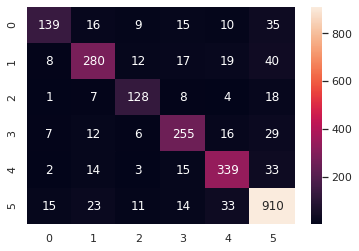

In [177]:
results = []
print('=' * 80)
print('BaggingClassifier')
results.append(benchmark((BaggingClassifier(RandomForestClassifier()))))


In [178]:
STOP

NameError: ignored

In [ ]:
print('=' * 80)
print('KNeighborsClassifier')
results.append(benchmark((KNeighborsClassifier())))

In [ ]:
print('=' * 80)
print('LinearSVC')
results.append(benchmark((LinearSVC())))

In [ ]:
print('=' * 80)
print('RandomForestClassifier')
results.append(benchmark((RandomForestClassifier())))

In [ ]:
print('=' * 80)
print("SGDClassifier")
results.append(benchmark(SGDClassifier()))

In [ ]:
print('=' * 80)
print("Perceptron")
results.append(benchmark((Perceptron())))

In [ ]:
print('=' * 80)
print("PassiveAggressiveClassifier")
results.append(benchmark((PassiveAggressiveClassifier())))

In [ ]:
print('=' * 80)
print("RidgeClassifier")
results.append(benchmark((RidgeClassifier())))

In [ ]:
print('=' * 80)
print('LogisticRegression')
results.append(benchmark((LogisticRegression())))

In [ ]:
print('=' * 80)
print("MultinomialNB")
#results.append(benchmark(MultinomialNB(alpha=.01)))

In [ ]:
print('=' * 80)
print("BernoulliNB")
#results.append(benchmark(BernoulliNB(alpha=.01)))

In [ ]:
print('=' * 80)
print("ComplementNB")
#results.append(benchmark(ComplementNB(alpha=.1)))

In [ ]:
print('=' * 80)
print('MLPClassifier')
results.append(benchmark((MLPClassifier())))

In [ ]:
# Train Ensemble Models
print('=' * 80)
print('ExtraTreesClassifier')
results.append(benchmark((ExtraTreesClassifier())))

In [ ]:
print('=' * 80)
print('GradientBoostingClassifier')
results.append(benchmark((GradientBoostingClassifier())))

In [ ]:
print('=' * 80)
print('KNeighborsClassifier')
results.append(benchmark((KNeighborsClassifier())))

In [ ]:
print('=' * 80)
print('DecisionTreeClassifier')
results.append(benchmark((DecisionTreeClassifier())))

In [ ]:
print('=' * 80)
print('ExtraTreeClassifier')
results.append(benchmark((ExtraTreeClassifier())))

In [ ]:
# Resultado da analise os modelos
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time", color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

In [ ]:
x_train = pd.DataFrame(x_train, columns=X.columns)

In [ ]:
import xgboost as xgb

# read in data
dtrain = xgb.DMatrix(data=x_train,label=y_train)
dtest = xgb.DMatrix(data=x_test,label=y_test)
# specify parameters via map
param = {'max_depth':3, 'eta':0.02, 'objective':'multi:softprob','num_class': 6 }
num_round = 100
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)

In [ ]:
predicted = []
for i in range(len(preds)):
  p = [np.argmax(preds[i])]
  predicted.append(p)

In [ ]:
# Valindando performance
print('Performance com os paramentros default\n', metrics.accuracy_score(y_test, predicted))

In [ ]:
xgb.plot_importance(bst)
plt.show()

In [ ]:
# Seleção do modelo 
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)

In [ ]:
# Identificando melhores hiperparametros

# Valindando performance
predicted = clf.predict(x_test)
print('Performance com os paramentros default\n', metrics.accuracy_score(y_test, predicted))

# Melhores hiperparametros
parameters = {
              "eta"    : [0.02, 0.05] ,
              "max_depth"        : [ 2, 3],
              "min_child_weight" : [ 2, 3],
              "gamma"            : [ 0.01, 0.1],
              "colsample_bytree" : [ 0.5, 1]
              }

gs_clf = GridSearchCV(clf, parameters, 
                      n_jobs=-1,
                      cv=5)
gs_clf = gs_clf.fit(X, y)

print('Melhor score\n', gs_clf.best_score_)
print('Melhores parametros')
pprint(gs_clf.best_params_) 

In [ ]:
clf.feature_importances_

In [ ]:
importances = pd.Series(data=clf.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=importances.index, orient='h')
plt.title("Importância de cada feature")
plt.show()

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1000)
model.fit(x_train, y_train)

In [ ]:
# Valindando performance
predicted = model.predict(x_test)
print('Performance com os paramentros default\n', metrics.accuracy_score(y_test, predicted))

In [ ]:
model.get_feature_importance()

In [ ]:
importances = pd.Series(data=model.get_feature_importance(), index=X.columns)
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=importances.index, orient='h')
plt.title("Importância de cada feature")
plt.show()